<a href="https://colab.research.google.com/github/Mung-Tamjung/PETECTIVE-ai/blob/main/dog_breeds_training_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%cd "/content/drive/MyDrive"
!pip install -U -r yolov5/requirements.txt

/content/drive/MyDrive
  Using cached numpy-2.1.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)


In [2]:
%cd "/content/drive/MyDrive/dataset"

/content/drive/MyDrive/dataset


In [3]:
!curl -L "https://app.roboflow.com/ds/R0Pdf1oVH6?key=oVXE6zTtB9" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: train/labels/Chihuahua46_JPG.rf.bbaf1fdcfc82198f9e7ecfc5ef9e3f12.txt  
  inflating: train/labels/Chihuahua46_JPG.rf.f1d6c9e13b84a8e6f3c9b83792847cf3.txt  
  inflating: train/labels/Chihuahua47_JPG.rf.394ba83698d86acb3f9d5bab684fe054.txt  
  inflating: train/labels/Chihuahua47_JPG.rf.9f03410099be1a0ab2e81c1852b99eeb.txt  
  inflating: train/labels/Chihuahua47_JPG.rf.b1cfefef765adec29df270162998edfa.txt  
  inflating: train/labels/Chihuahua48_JPG.rf.11e0c8cfe07b1c35a4e5e5c3902c2318.txt  
  inflating: train/labels/Chihuahua48_JPG.rf.cfa3e093c11801ecc816a41ae6eeb3e6.txt  
  inflating: train/labels/Chihuahua48_JPG.rf.e94d4e985fd22f2bc11790710bf80cd9.txt  
  inflating: train/labels/Chihuahua4_JPG.rf.3716ba6d1c77e46b10e5aa9586412cd3.txt  
  inflating: train/labels/Chihuahua4_JPG.rf.468c406ba9ad844f37a5dc6030dd2ca4.txt  
  inflating: train/labels/Chihuahua4_JPG.rf.99727b1e7f1c04324c203cfa25200bc1.txt  
  inflating: train/labels/Chihuahua50_JPG.r

In [7]:
from glob import glob

# 이미지 경로 list로 넣기
train_img_list = glob('/content/drive/MyDrive/dataset/train/images/*.jpg') + glob('/content/drive/MyDrive/dataset/train/images/*.jpeg') + glob('/content/drive/MyDrive/dataset/train/images/*.png')
valid_img_list = glob('/content/drive/MyDrive/dataset/valid/images/*.jpg') + glob('/content/drive/MyDrive/dataset/valid/images/*.jpeg') + glob('./content/drive/MyDrive/dataset/valid/images/*.png')
test_img_list = glob('/content/drive/MyDrive/dataset/test/images/*.jpg') + glob('/content/drive/MyDrive/dataset/test/images/*.jpeg') + glob('./content/drive/MyDrive/dataset/test/images/*.png')


# txt 파일에 write
with open('/content/drive/MyDrive/dataset/train.txt', 'w') as f:
	f.write('\n'.join(train_img_list) + '\n')

with open('/content/drive/MyDrive/dataset/valid.txt', 'w') as f:
	f.write('\n'.join(valid_img_list) + '\n')

with open('/content/drive/MyDrive/dataset/test.txt', 'w') as f:
	f.write('\n'.join(test_img_list) + '\n')

In [8]:
import yaml

with open('/content/drive/MyDrive/dataset/data.yaml', 'r') as f:
	data = yaml.safe_load(f)

print(data)

data['train'] = '/content/drive/MyDrive/dataset/train.txt'
data['val'] = '/content/drive/MyDrive/dataset/valid.txt'
data['test'] = '/content/drive/MyDrive/dataset/test.txt'

with open('/content/drive/MyDrive/dataset/data.yaml', 'w') as f:
	yaml.dump(data, f)

{'names': ['Bichon', 'Chihuahua', 'Jindo', 'Maltese', 'Pomeranian', 'Poodle', 'Retriever', 'Shihtzu', 'YorkshireTerrier', 'persian', 'russianblue', 'scottishfold', 'siam', 'turkishangora'], 'nc': 14, 'roboflow': {'license': 'CC BY 4.0', 'project': 'cat-and-dog-breeds-fgmzk', 'url': 'https://universe.roboflow.com/petective/cat-and-dog-breeds-fgmzk/dataset/12', 'version': 12, 'workspace': 'petective'}, 'test': '/content/drive/MyDrive/dataset/test.txt', 'train': '/content/drive/MyDrive/dataset/train.txt', 'val': '/content/drive/MyDrive/dataset/valid.txt'}


In [9]:
%cd /content/drive/MyDrive/yolov5

/content/drive/MyDrive/yolov5


In [10]:
!python train.py --img 640 --batch 16 --epochs 50 --data /content/drive/MyDrive/dataset/data.yaml \
--cfg ./models/yolov5s.yaml --weights yolov5s.pt --name dog_breeds_training_8

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  with torch.cuda.amp.autocast(amp):
      46/49      4.66G    0.01956    0.01255   0.009665         28        640:  42% 294/693 [00:41<00:55,  7.17it/s]/content/drive/MyDrive/yolov5/train.py:381: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      46/49      4.66G    0.01958    0.01255   0.009642         35        640:  42% 294/693 [00:42<00:55,  7.17it/s]/content/drive/MyDrive/yolov5/train.py:381: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      46/49      4.66G     0.0196    0.01255   0.009626         43        640:  43% 296/693 [00:42<00:48,  8.24it/s]/content/drive/MyDrive/yolov5/train.py:381: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  wi

In [11]:
!python /content/drive/MyDrive/yolov5/detect.py --weights /content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_8/weights/best.pt --img 640 --conf 0.5 --source /content/drive/MyDrive/dog_testimage/BichonTest1.jpg

detect: weights=['/content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_8/weights/best.pt'], source=/content/drive/MyDrive/dog_testimage/BichonTest1.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-321-g3742ab49 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7047883 parameters, 0 gradients, 15.9 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/drive/MyDrive/dog_testimage/BichonTest1.jpg: 640x544 1 Bichon, 38.3ms
Speed: 0.7ms pre-process, 38.3ms inference, 558.2ms NMS per image at shape (1, 3, 640, 640)
Results sav

In [12]:
!python /content/drive/MyDrive/yolov5/detect.py --weights /content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_7/weights/best.pt --img 640 --conf 0.5 --source /content/drive/MyDrive/dog_testimage/BichonTest1.jpg

detect: weights=['/content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_7/weights/best.pt'], source=/content/drive/MyDrive/dog_testimage/BichonTest1.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-321-g3742ab49 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7047883 parameters, 0 gradients, 15.9 GFLOPs
image 1/1 /content/drive/MyDrive/dog_testimage/BichonTest1.jpg: 640x544 1 Bichon, 37.9ms
Speed: 0.6ms pre-process, 37.9ms inference, 519.4ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp67


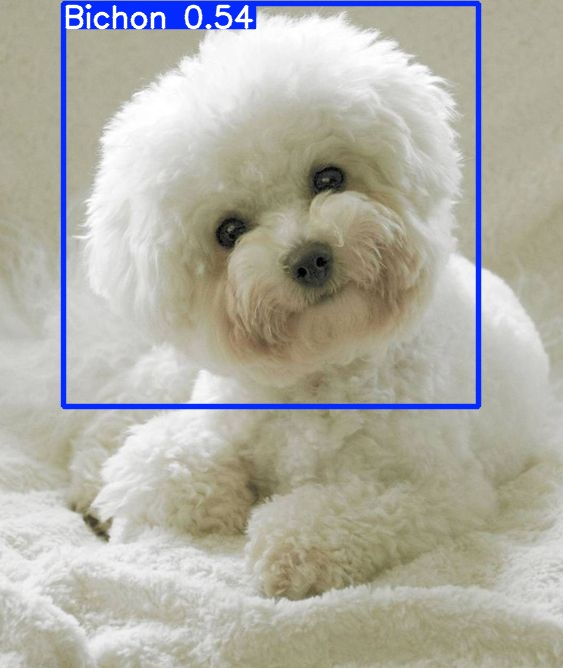

In [15]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/yolov5/runs/detect/exp66/BichonTest1.jpg')
cv2_imshow(img)

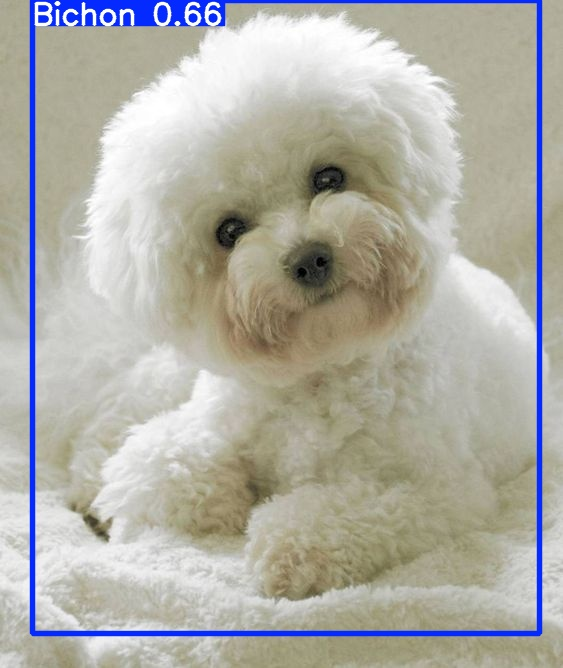

In [16]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/yolov5/runs/detect/exp67/BichonTest1.jpg')
cv2_imshow(img)

In [13]:
!python /content/drive/MyDrive/yolov5/detect.py --weights /content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_7/weights/best.pt --img 640 --conf 0.5 --source /content/drive/MyDrive/dog_testimage/BichonTest3.jpeg

detect: weights=['/content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_7/weights/best.pt'], source=/content/drive/MyDrive/dog_testimage/BichonTest3.jpeg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-321-g3742ab49 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7047883 parameters, 0 gradients, 15.9 GFLOPs
image 1/1 /content/drive/MyDrive/dog_testimage/BichonTest3.jpeg: 384x640 (no detections), 38.2ms
Speed: 0.6ms pre-process, 38.2ms inference, 10.8ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp68


In [14]:
!python /content/drive/MyDrive/yolov5/detect.py --weights /content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_8/weights/best.pt --img 640 --conf 0.5 --source /content/drive/MyDrive/dog_testimage/BichonTest3.jpeg

detect: weights=['/content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_8/weights/best.pt'], source=/content/drive/MyDrive/dog_testimage/BichonTest3.jpeg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-321-g3742ab49 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7047883 parameters, 0 gradients, 15.9 GFLOPs
image 1/1 /content/drive/MyDrive/dog_testimage/BichonTest3.jpeg: 384x640 (no detections), 38.1ms
Speed: 0.5ms pre-process, 38.1ms inference, 11.7ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp69


**BichonTest3 검출 실패**

In [17]:
!python /content/drive/MyDrive/yolov5/detect.py --weights /content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_7/weights/best.pt --img 640 --conf 0.5 --source /content/drive/MyDrive/dog_testimage/ChihuahuaTest4.jpg

detect: weights=['/content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_7/weights/best.pt'], source=/content/drive/MyDrive/dog_testimage/ChihuahuaTest4.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-321-g3742ab49 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7047883 parameters, 0 gradients, 15.9 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/drive/MyDrive/dog_testimage/ChihuahuaTest4.jpg: 640x480 1 Chihuahua, 48.7ms
Speed: 0.8ms pre-process, 48.7ms inference, 600.6ms NMS per image at shape (1, 3, 640, 640)
Re

In [18]:
!python /content/drive/MyDrive/yolov5/detect.py --weights /content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_8/weights/best.pt --img 640 --conf 0.5 --source /content/drive/MyDrive/dog_testimage/ChihuahuaTest4.jpg

detect: weights=['/content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_8/weights/best.pt'], source=/content/drive/MyDrive/dog_testimage/ChihuahuaTest4.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-321-g3742ab49 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7047883 parameters, 0 gradients, 15.9 GFLOPs
image 1/1 /content/drive/MyDrive/dog_testimage/ChihuahuaTest4.jpg: 640x480 1 Chihuahua, 37.3ms
Speed: 0.5ms pre-process, 37.3ms inference, 510.5ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp71


In [19]:
!python /content/drive/MyDrive/yolov5/detect.py --weights /content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_7/weights/best.pt --img 640 --conf 0.5 --source /content/drive/MyDrive/dog_testimage/ChihuahuaTest6.jpg

detect: weights=['/content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_7/weights/best.pt'], source=/content/drive/MyDrive/dog_testimage/ChihuahuaTest6.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-321-g3742ab49 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7047883 parameters, 0 gradients, 15.9 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/drive/MyDrive/dog_testimage/ChihuahuaTest6.jpg: 384x640 1 Chihuahua, 39.3ms
Speed: 0.6ms pre-process, 39.3ms inference, 692.1ms NMS per image at shape (1, 3, 640, 640)
Re

In [20]:
!python /content/drive/MyDrive/yolov5/detect.py --weights /content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_8/weights/best.pt --img 640 --conf 0.5 --source /content/drive/MyDrive/dog_testimage/ChihuahuaTest6.jpg

detect: weights=['/content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_8/weights/best.pt'], source=/content/drive/MyDrive/dog_testimage/ChihuahuaTest6.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-321-g3742ab49 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7047883 parameters, 0 gradients, 15.9 GFLOPs
image 1/1 /content/drive/MyDrive/dog_testimage/ChihuahuaTest6.jpg: 384x640 1 Chihuahua, 37.6ms
Speed: 0.5ms pre-process, 37.6ms inference, 512.6ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp73


In [21]:
!python /content/drive/MyDrive/yolov5/detect.py --weights /content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_7/weights/best.pt --img 640 --conf 0.5 --source /content/drive/MyDrive/dog_testimage/MalteseTest1.jpg

detect: weights=['/content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_7/weights/best.pt'], source=/content/drive/MyDrive/dog_testimage/MalteseTest1.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-321-g3742ab49 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7047883 parameters, 0 gradients, 15.9 GFLOPs
image 1/1 /content/drive/MyDrive/dog_testimage/MalteseTest1.jpg: 576x640 (no detections), 39.3ms
Speed: 0.7ms pre-process, 39.3ms inference, 10.5ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp74


In [22]:
!python /content/drive/MyDrive/yolov5/detect.py --weights /content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_8/weights/best.pt --img 640 --conf 0.5 --source /content/drive/MyDrive/dog_testimage/MalteseTest1.jpg

detect: weights=['/content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_8/weights/best.pt'], source=/content/drive/MyDrive/dog_testimage/MalteseTest1.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-321-g3742ab49 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7047883 parameters, 0 gradients, 15.9 GFLOPs
image 1/1 /content/drive/MyDrive/dog_testimage/MalteseTest1.jpg: 576x640 1 Maltese, 38.9ms
Speed: 0.6ms pre-process, 38.9ms inference, 519.0ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp75


**dog_breeds_training_7에서 실패했던 MalteseTest1 이미지 검출 성공**


In [23]:
!python /content/drive/MyDrive/yolov5/detect.py --weights /content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_7/weights/best.pt --img 640 --conf 0.5 --source /content/drive/MyDrive/dog_testimage/PomeranianTest1.jpg

detect: weights=['/content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_7/weights/best.pt'], source=/content/drive/MyDrive/dog_testimage/PomeranianTest1.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-321-g3742ab49 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7047883 parameters, 0 gradients, 15.9 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/drive/MyDrive/dog_testimage/PomeranianTest1.jpg: 640x384 1 Pomeranian, 39.2ms
Speed: 0.6ms pre-process, 39.2ms inference, 663.1ms NMS per image at shape (1, 3, 640, 640)

In [24]:
!python /content/drive/MyDrive/yolov5/detect.py --weights /content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_8/weights/best.pt --img 640 --conf 0.5 --source /content/drive/MyDrive/dog_testimage/PomeranianTest1.jpg

detect: weights=['/content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_8/weights/best.pt'], source=/content/drive/MyDrive/dog_testimage/PomeranianTest1.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-321-g3742ab49 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7047883 parameters, 0 gradients, 15.9 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/drive/MyDrive/dog_testimage/PomeranianTest1.jpg: 640x384 1 Pomeranian, 37.6ms
Speed: 0.5ms pre-process, 37.6ms inference, 585.8ms NMS per image at shape (1, 3, 640, 640)

In [26]:
!python /content/drive/MyDrive/yolov5/detect.py --weights /content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_8/weights/best.pt --img 640 --conf 0.5 --source /content/drive/MyDrive/dog_testimage/PomeranianTest2.jpeg

detect: weights=['/content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_8/weights/best.pt'], source=/content/drive/MyDrive/dog_testimage/PomeranianTest2.jpeg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-321-g3742ab49 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7047883 parameters, 0 gradients, 15.9 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/drive/MyDrive/dog_testimage/PomeranianTest2.jpeg: 384x640 1 Pomeranian, 38.5ms
Speed: 0.6ms pre-process, 38.5ms inference, 616.0ms NMS per image at shape (1, 3, 640, 64

In [30]:
!python /content/drive/MyDrive/yolov5/detect.py --weights /content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_7/weights/best.pt --img 640 --conf 0.5 --source /content/drive/MyDrive/dog_testimage/PomeranianTest2.jpeg

detect: weights=['/content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_7/weights/best.pt'], source=/content/drive/MyDrive/dog_testimage/PomeranianTest2.jpeg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-321-g3742ab49 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7047883 parameters, 0 gradients, 15.9 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/drive/MyDrive/dog_testimage/PomeranianTest2.jpeg: 384x640 1 Pomeranian, 38.3ms
Speed: 0.5ms pre-process, 38.3ms inference, 637.5ms NMS per image at shape (1, 3, 640, 64

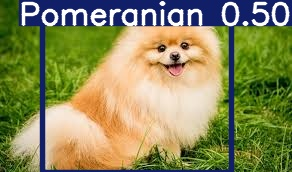

In [33]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/yolov5/runs/detect/exp83/PomeranianTest2.jpeg')
cv2_imshow(img)

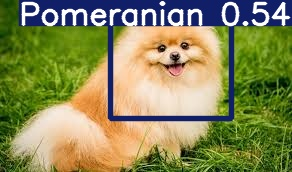

In [32]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/yolov5/runs/detect/exp79/PomeranianTest2.jpeg')
cv2_imshow(img)

**ver7 -> 0.50,
ver8 -> 0.54**

In [27]:
!python /content/drive/MyDrive/yolov5/detect.py --weights /content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_8/weights/best.pt --img 640 --conf 0.5 --source /content/drive/MyDrive/dog_testimage/PoodleTest1.jpg

detect: weights=['/content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_8/weights/best.pt'], source=/content/drive/MyDrive/dog_testimage/PoodleTest1.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-321-g3742ab49 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7047883 parameters, 0 gradients, 15.9 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/drive/MyDrive/dog_testimage/PoodleTest1.jpg: 512x640 1 Poodle, 38.3ms
Speed: 0.7ms pre-process, 38.3ms inference, 594.7ms NMS per image at shape (1, 3, 640, 640)
Results sav

In [29]:
!python /content/drive/MyDrive/yolov5/detect.py --weights /content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_7/weights/best.pt --img 640 --conf 0.5 --source /content/drive/MyDrive/dog_testimage/PoodleTest1.jpg

detect: weights=['/content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_7/weights/best.pt'], source=/content/drive/MyDrive/dog_testimage/PoodleTest1.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-321-g3742ab49 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7047883 parameters, 0 gradients, 15.9 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/drive/MyDrive/dog_testimage/PoodleTest1.jpg: 512x640 1 Poodle, 38.3ms
Speed: 0.5ms pre-process, 38.3ms inference, 590.0ms NMS per image at shape (1, 3, 640, 640)
Results sav

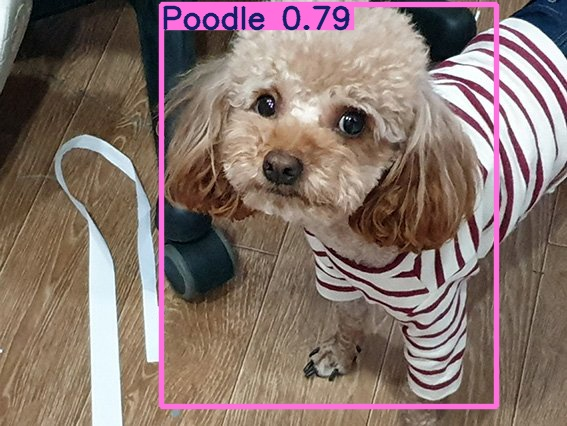

In [34]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/yolov5/runs/detect/exp82/PoodleTest1.jpg')
cv2_imshow(img)

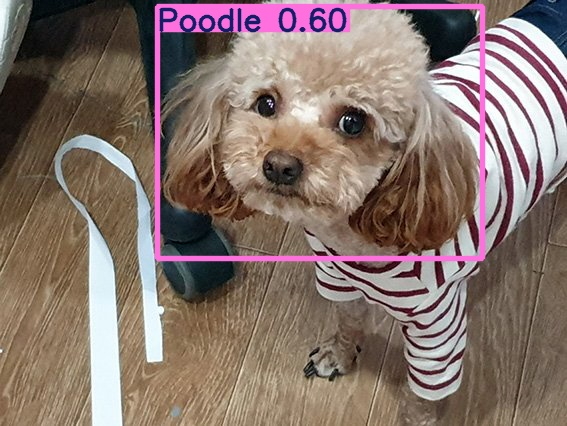

In [35]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/yolov5/runs/detect/exp80/PoodleTest1.jpg')
cv2_imshow(img)

**dog_breeds_training_8 : 기존 데이터셋(Pomeranian, Poodle, Maltese, Chihuahua, Bichon)의 train/valid/test 비율 조정**